# Project 1: SAT & ACT Analysis

## Problem Statement

There is a lot of data in the world. How can we organize, explore, understand, gather useful insights and make informed decisions from it? This project demonstrates a powerful and effective process to answer these questions utilizing python and some of its most powerful libraries.  

## Executive Summary

We will be analyzing ACT/SAT data from 2017 and 2018. 

First we import the necessary libraries: 
 - matplotlib: data visualization
 - numpy: scientific computing
 - pandas: data analysis
 - scipy: statistical testing
 - seaborn: data visualization
 
Next, we import, inspect and clean our data using pandas. We will make sure all datatypes are appropriate for analysis, correct any errors found by cross referencing the data source, rename columns for ease of use, drop any duplicate columns and merge our data.

Using pandas, we will explore and analyze our data looking for trends and patterns. We will examine participation rates and average total scores between the ACT and SAT.

Using matplotlib and seaborn, we will visualize our data using barplots, histograms, scatterplots, regplots, boxplots, and choropleth maps. Each visualization will be accompanied by a description and interpretation.

We will combine our analysis with outside research and dive deeper into a four states: Colorado, Florida, Illinois and Utah.

Lastly we will state our conclusions and recommendations based on our data analysis and outside research.

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
- [Bonus: Descriptive and Inferential Statistics](#Bonus:-Descriptive-and-Inferential-Statistics)


**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

In [193]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [194]:
sat_2017 = pd.read_csv('./data/sat_2017.csv')
act_2017 = pd.read_csv('./data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [195]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [196]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [197]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [198]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [199]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [200]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


#### ACT Data 2017

This data frame contains each state's average scores of each section of the ACT including English, Math, Reading, Science and includes the average composite score. The composite score is the average of all individual sections. The set also includes the name of the state (fully written out) and the percentage of students in the state that participated in the ACT. Some states have mandatory participation and are accordingly identified as 100% participation. This data frame includes the national averages located in row 1.

#### Sat Data 2017

This data frame contains each state's average scores of each section of the SAT including Evidence-Based Reading and Writing, Math and the Total. The set includes the name of the state (fully written out) and the percentage of students in the state that participated in the SAT. This data frame does NOT include the national averages.

#### 4a. Does the data look complete? 

Yes, for the most part the data for both sets look complete. The ACT data set includes a row for the national average. 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Each section of ACT is scored from 1 to 36. The data in this set looks appropriate.

Each seciton of the SAT is scored from 200 to 800. The total score ranges from 400 to 1600

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [201]:
sat_2017.at[20, 'Math'] = 524
sat_2017[sat_2017['State'] == 'Maryland'] #Fixed

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


#### 5. What are your data types? 
Display the data types of each feature. 

In [202]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [203]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

- In `sat_2017`, the Participation column's data is a string object. This should be converted to float (or int).
- In `act_2017` the Participation column's data is a string object. This should be converted to float (or int).
- In `act_2017` the Composite column's data is an object. This should be converted to int.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [204]:
# Defining a function to pass into .apply
def percent_to_float(percent):
    return int(percent[:-1]) / 100

In [205]:
# Testing function
percent_to_float('100%')

1.0

In [206]:
act_2017['Participation'] = act_2017['Participation'].apply(percent_to_float)

In [207]:
sat_2017['Participation'] = sat_2017['Participation'].apply(percent_to_float)

- Fix any individual values preventing other columns from being the appropriate type.

In [208]:
# First way to do it.
act_2017[act_2017['State'] == 'Wyoming']
act_2017.loc[act_2017['State'] == 'Wyoming', 'Composite'] = 20.7
act_2017[act_2017['State'] == 'Wyoming']

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,1.0,19.4,19.8,20.8,20.6,20.7


In [209]:
# Second way to do it.
act_2017.at[51, 'Composite'] = 20.7
act_2017[act_2017['State'] == 'Wyoming']

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,1.0,19.4,19.8,20.8,20.6,20.7


In [210]:
act_2017['Composite'] = act_2017['Composite'].apply(lambda x: float(x))

- Finish your data modifications by making sure the columns are now typed appropriately.

In [211]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

- Display the data types again to confirm they are correct.

In [212]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [213]:
sat_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [214]:
act_2017.rename(columns = {'State': 'state', 
                           'Participation': 'act_2017_participation', 
                           'English': 'act_2017_english', 
                           'Math': 'act_2017_math',
                           'Reading': 'act_2017_reading',
                           'Science': 'act_2017_science',
                           'Composite': 'act_2017_composite'},
               inplace = True)

sat_2017.rename(columns = {'State': 'state',
                           'Participation': 'sat_2017_participation',
                           'Evidence-Based Reading and Writing': 'sat_2017_readwrite',
                           'Math': 'sat_2017_math',
                           'Total': 'sat_2017_total'},
               inplace = True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

In [215]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   51 non-null     object 
 1   sat_2017_participation  51 non-null     float64
 2   sat_2017_readwrite      51 non-null     int64  
 3   sat_2017_math           51 non-null     int64  
 4   sat_2017_total          51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*string*|act_2017|USA state where data collected. The rest of the row's data is associated with the state labeled in this column.|
|**act_2017_participation**|*float*|act_2017|Percent of total students that took the test.|
|**act_2017_english**|*float*|act_2017|Average score on the english section. Scores range from 1 to 36.|
|**act_2017_math**|*float*|act_2017|Average score on the math section. Scores range from 1 to 36.|
|**act_2017_reading**|*float*|act_2017|Average score on the reading section. Scores range from 1 to 36.|
|**act_2017_science**|*float*|act_2017|Average score on the science section. Scores range from 1 to 36.|
|**act_2017_composite**|*float*|act_2017|Average composite score. Scores range from 1 to 36.|


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*string*|sat_2017|State within the USA where data collected. The rest of the row's data is associated with the state labeled in this column.|
|**sat_2017_participation**|*float*|sat_2017|Percent of total students that took the test.|
|**sat_2017_readwrite**|*int*|sat_2017|Average score of the Evidence-Based Reading and Writing section of the SAT. Scores range from 200 to 800.|
|**sat_2017_math**|*int*|sat_2017|Average score of the Math section of the SAT. Scores range from 200 to 800.|
|**sat_2017_total**|*int*|sat_2017|Average total score of the SAT. Scores range from 400 to 1600.

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [216]:
act_2017.drop(0, axis=0, inplace=True)

In [217]:
act_2017.reset_index(drop=True, inplace=True)

In [218]:
act_2017.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [219]:
combined_2017 = act_2017.merge(sat_2017)

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [220]:
combined_2017.to_csv('./data/combined_2017.csv')

## 2018 Data Import and Cleaning

Read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes. For the **2018 ACT Data**, only the `Composite` scores are available. Repeat the same processes to clean the 2018 data here as you were instructed in the previous sections above.

In [221]:
act_2018 = pd.read_csv('./data/act_2018.csv')
sat_2018 = pd.read_csv('./data/sat_2018.csv')

In [222]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [223]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [224]:
# Converting 'Participation' percentages to floats
act_2018['Participation'] = act_2018['Participation'].apply(percent_to_float)
sat_2018['Participation'] = sat_2018['Participation'].apply(percent_to_float)

In [225]:
# Renaming act_2018 columns
act_2018.rename(columns = {'State': 'state',
                           'Participation': 'act_2018_participation',
                           'Composite': 'act_2018_composite'},
               inplace = True)

In [226]:
# Renaming sat_2018 columns
sat_2018.rename(columns = {'State': 'state',
                           'Participation': 'sat_2018_participation',
                           'Evidence-Based Reading and Writing': 'sat_2018_readwrite',
                           'Math': 'sat_2018_math',
                           'Total': 'sat_2018_total'},
               inplace = True)

In [227]:
sat_2018.drop_duplicates(inplace = True)

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*string*|act_2018|USA state where data collected. The rest of the row's data is associated with the state labeled in this column.|
|**act_2018_participation**|*float*|act_2018|Percent of total students that took the test.|
|**act_2018_composite**|*float*|act_2018|Average composite score. Scores range from 1 to 36.|

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*string*|sat_2018|State within the USA where data collected. The rest of the row's data is associated with the state labeled in this column.|
|**sat_2018_participation**|*float*|sat_2018|Percent of total students that took the test.|
|**sat_2018_readwrite**|*int*|sat_2018|Average score of the Evidence-Based Reading and Writing section of the SAT. Scores range from 200 to 800.|
|**sat_2018_math**|*int*|sat_2018|Average score of the Math section of the SAT. Scores range from 200 to 800.|
|**sat_2018_total**|*int*|sat_2018|Average total score of the SAT. Scores range from 400 to 1600.

In [228]:
combined_2018 = act_2018.merge(sat_2018)

In [229]:
combined_2018.to_csv('./data/combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [230]:
final = combined_2017.merge(combined_2018)

In [231]:
final.to_csv('./data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [232]:
final.describe()

,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_readwrite,sat_2017_math,sat_2017_total,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_readwrite,sat_2018_math,sat_2018_total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.647843,20.927451,21.192157,22.011765,21.045098,21.531373,0.397059,569.725490,557.490196,1127.313725,0.612353,21.503922,0.458824,563.980392,556.647059,1120.725490
std,0.328063,2.347942,1.994878,2.064524,3.185675,2.018067,0.351126,44.679784,46.141683,90.520382,0.346483,2.120279,0.375002,47.126422,47.189331,93.191433
min,0.080000,16.300000,18.000000,18.100000,2.300000,17.800000,0.020000,503.000000,492.000000,996.000000,0.070000,17.700000,0.020000,480.000000,486.000000,998.000000
25%,0.310000,19.000000,19.400000,20.450000,19.900000,19.800000,0.040000,533.500000,523.500000,1055.500000,0.270000,19.950000,0.045000,534.500000,522.500000,1057.500000
50%,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.380000,559.000000,548.000000,1107.000000,0.660000,21.300000,0.520000,552.000000,544.000000,1098.000000
75%,1.000000,23.300000,23.100000,24.150000,22.750000,23.600000,0.660000,613.000000,599.000000,1212.000000,1.000000,23.750000,0.775000,610.500000,593.500000,1204.000000
max,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,644.000000,651.000000,1295.000000,1.000000,25.600000,1.000000,643.000000,655.000000,1298.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [233]:
def standard_dev(lst):
    try:
        avg = lst.mean()
        total = 0
        for item in lst:
            total += ((item - avg) ** 2)
        return (total/ (len(lst) - 1)) ** .5
    except:
        pass
        

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [234]:
final['act_2017_participation'].std()

0.3280628825422967

In [235]:
sd = {key: standard_dev(value) for key, value in final.items()}
sd

{'state': None,
 'act_2017_participation': 0.3280628825422967,
 'act_2017_english': 2.347941944032905,
 'act_2017_math': 1.994877754375431,
 'act_2017_reading': 2.0645238733251334,
 'act_2017_science': 3.1856750446641717,
 'act_2017_composite': 2.0180674117658635,
 'sat_2017_participation': 0.3511255850412901,
 'sat_2017_readwrite': 44.679784436083644,
 'sat_2017_math': 46.14168291210004,
 'sat_2017_total': 90.52038227848543,
 'act_2018_participation': 0.34648283210164466,
 'act_2018_composite': 2.1202793008765357,
 'sat_2018_participation': 0.37500211764107955,
 'sat_2018_readwrite': 47.126421547186645,
 'sat_2018_math': 47.189330798141974,
 'sat_2018_total': 93.19143274601426}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Yes. They bothed matched up. I had to change n to n-1 to get them to match.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

## High and Low Participation Rates

In [236]:
final.sort_values(by='act_2017_participation', ascending=False)[['state', 'act_2017_participation']].head()

,state,act_2017_participation
0,Alabama,1.0
16,Kentucky,1.0
49,Wisconsin,1.0
44,Utah,1.0
42,Tennessee,1.0


The states above have the highest (top 5) ACT participation rate in 2017. It seems as though these states have 100% participation because of a state mandate. Below I will query the database for all states with a 100% participation rate.

In [237]:
final[final['act_2017_participation'] == 1][['state', 'act_2017_participation']]

,state,act_2017_participation
0,Alabama,1.0
3,Arkansas,1.0
5,Colorado,1.0
16,Kentucky,1.0
17,Louisiana,1.0
23,Minnesota,1.0
24,Mississippi,1.0
25,Missouri,1.0
26,Montana,1.0
28,Nevada,1.0


Above are all of the states in 2017 that required students to take the ACT

In [238]:
final[final['act_2018_participation'] == 1][['state', 'act_2018_participation']]

,state,act_2018_participation
0,Alabama,1.0
3,Arkansas,1.0
16,Kentucky,1.0
17,Louisiana,1.0
24,Mississippi,1.0
25,Missouri,1.0
26,Montana,1.0
27,Nebraska,1.0
28,Nevada,1.0
33,North Carolina,1.0


The states above have 100% ACT participation rate in 2018.

In [239]:
final.sort_values(by='sat_2017_participation', ascending=False)[['state', 'sat_2017_participation']].head()

,state,sat_2017_participation
7,Delaware,1.00
22,Michigan,1.00
6,Connecticut,1.00
29,New Hampshire,0.96
19,Maine,0.95


Above are the top 5 states with highest SAT participation in 2017

In [240]:
final.sort_values(by='sat_2018_participation', ascending=False)[['state', 'sat_2018_participation']].head()

,state,sat_2018_participation
5,Colorado,1.0
6,Connecticut,1.0
7,Delaware,1.0
22,Michigan,1.0
11,Idaho,1.0


Above are the top 5 states with the highest SAT participation in 2018. Colorado and Idaho now have 100% participation.

In [241]:
# Noticed Maine was duplicated.
final.drop_duplicates(inplace = True)

### High and Low Average/Composite Scores

In [242]:
final.sort_values(by='act_2017_composite', ascending=False)[['state', 'act_2017_composite']].head()      

,state,act_2017_composite
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
18,Maine,24.3
32,New York,24.2


States with the highest average ACT composite score in 2017

In [243]:
final.sort_values(by='act_2017_composite')[['state', 'act_2017_composite']].head()      

,state,act_2017_composite
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
10,Hawaii,19.0
33,North Carolina,19.1


States with the lowest average ACT composite score in 2017

In [244]:
final.sort_values(by='act_2018_composite', ascending=False)[['state', 'act_2018_composite']].head()

,state,act_2018_composite
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.2


States with the highest average ACT composite score in 2018

In [245]:
final.sort_values(by='act_2018_composite')[['state', 'act_2018_composite']].head()

,state,act_2018_composite
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
10,Hawaii,18.9
0,Alabama,19.1


States with the lowest average ACT composite score in 2018

In [246]:
final.sort_values(by='sat_2017_total', ascending=False)[['state', 'sat_2017_total']].head()

,state,sat_2017_total
23,Minnesota,1295
49,Wisconsin,1291
14,Iowa,1275
25,Missouri,1271
15,Kansas,1260


States with the highest average total SAT score in 2017

In [247]:
final.sort_values(by='sat_2017_total')[['state', 'sat_2017_total']].head()

,state,sat_2017_total
7,Delaware,996
11,Idaho,1005
22,Michigan,1005
18,Maine,1012
8,Florida,1017


States with the lowest average total SAT score in 2017

In [248]:
final.sort_values(by='sat_2018_total', ascending=False)[['state', 'sat_2018_total']].head()

,state,sat_2018_total
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
14,Iowa,1265
15,Kansas,1265


States with the highest average total SAT score in 2018

In [249]:
final.sort_values(by='sat_2018_total')[['state', 'sat_2018_total']].head()

,state,sat_2018_total
7,Delaware,998
48,West Virginia,999
11,Idaho,1001
44,Utah,1010
10,Hawaii,1010


States with the lowest average total SAT score in 2018

### 100% Participation Rate Change

In [250]:
# Creating rate change columns
final['act_participation_change'] = final['act_2018_participation'] - final['act_2017_participation']
final['sat_participation_change'] = final['sat_2018_participation'] - final['sat_2017_participation']

final[
    ((final['act_2017_participation'] == 1) &
     (final['act_participation_change'] != 0))
     |
    ((final['sat_2017_participation'] == 1) &
     (final['sat_participation_change'] != 0))
     |
    ((final['act_2018_participation'] == 1) &
     (final['act_participation_change'] != 0))
     |
    ((final['act_2018_participation'] == 1) &
     (final['act_participation_change'] != 0))
     ][['state', 
       'act_2017_participation', 
       'act_2018_participation',
       'sat_2017_participation',
       'sat_2018_participation',
       'act_participation_change',
       'sat_participation_change']]

,state,act_2017_participation,act_2018_participation,sat_2017_participation,sat_2018_participation,act_participation_change,sat_participation_change
5,Colorado,1.00,0.30,0.11,1.00,-0.70,0.89
23,Minnesota,1.00,0.99,0.03,0.04,-0.01,0.01
27,Nebraska,0.84,1.00,0.03,0.03,0.16,0.00
35,Ohio,0.75,1.00,0.12,0.18,0.25,0.06


All of the states above show a change from 100% year to year 

### Above 50% participation in SAT and ACT

In [251]:
final[(final['act_2017_participation'] > .5) & 
      (final['sat_2017_participation'] > .5)]

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_readwrite,sat_2017_math,sat_2017_total,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_readwrite,sat_2018_math,sat_2018_total,act_participation_change,sat_participation_change
8,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,1017,0.66,19.9,0.56,550,549,1099,-0.07,-0.27
9,Georgia,0.55,21.0,20.9,22.0,21.3,21.4,0.61,535,515,1050,0.53,21.4,0.70,542,522,1064,-0.02,0.09
10,Hawaii,0.90,17.8,19.2,19.2,19.3,19.0,0.55,544,541,1085,0.89,18.9,0.56,480,530,1010,-0.01,0.01


Florida, Georigia and Hawaii have over 50% participation in both tests in 2017.

In [252]:
final[(final['act_2018_participation'] > .5) & 
      (final['sat_2018_participation'] > .5)] 

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_readwrite,sat_2017_math,sat_2017_total,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_readwrite,sat_2018_math,sat_2018_total,act_participation_change,sat_participation_change
8,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,1017,0.66,19.9,0.56,550,549,1099,-0.07,-0.27
9,Georgia,0.55,21.0,20.9,22.0,21.3,21.4,0.61,535,515,1050,0.53,21.4,0.70,542,522,1064,-0.02,0.09
10,Hawaii,0.90,17.8,19.2,19.2,19.3,19.0,0.55,544,541,1085,0.89,18.9,0.56,480,530,1010,-0.01,0.01
33,North Carolina,1.00,17.8,19.3,19.6,19.3,19.1,0.49,546,535,1081,1.00,19.1,0.52,554,543,1098,0.00,0.03
40,South Carolina,1.00,17.5,18.6,19.1,18.9,18.7,0.50,543,521,1064,1.00,18.3,0.55,547,523,1070,0.00,0.05


Florida, Georgia and Hawaii remain in the "above 50% club" and are joined by NC and SC.

Colorado had one of the greatest fluctuations of participation rates.

In [253]:
final[final['state'] == 'Colorado'][['state','sat_2017_participation', 'sat_2018_participation', 'sat_2017_total', 'sat_2018_total', 'act_2017_composite', 'act_2018_composite']]

,state,sat_2017_participation,sat_2018_participation,sat_2017_total,sat_2018_total,act_2017_composite,act_2018_composite
5,Colorado,0.11,1.0,1201,1025,20.8,23.9


Illinois had a very large increase in SAT participation rate from 2017 to 2018

In [254]:
final[final['state'] == 'Illinois'][['state', 'sat_2017_participation', 'sat_2018_participation']]

,state,sat_2017_participation,sat_2018_participation
12,Illinois,0.09,0.99


Utah had a very large drop in average test score from 2017 to 2018

In [255]:
final[final['state'] == 'Utah'][['state', 'sat_2017_total', 'sat_2018_total']]

,state,sat_2017_total,sat_2018_total
44,Utah,1238,1010


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

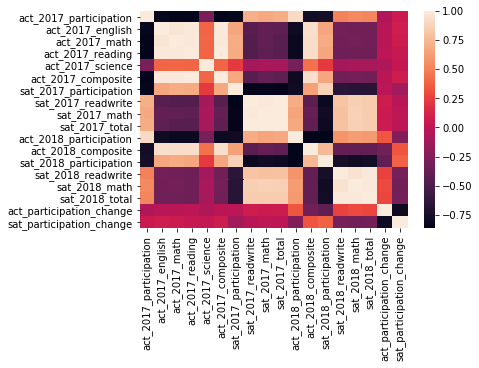

In [256]:
fig = sns.heatmap(final.corr());

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [257]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        plt.title(column) # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

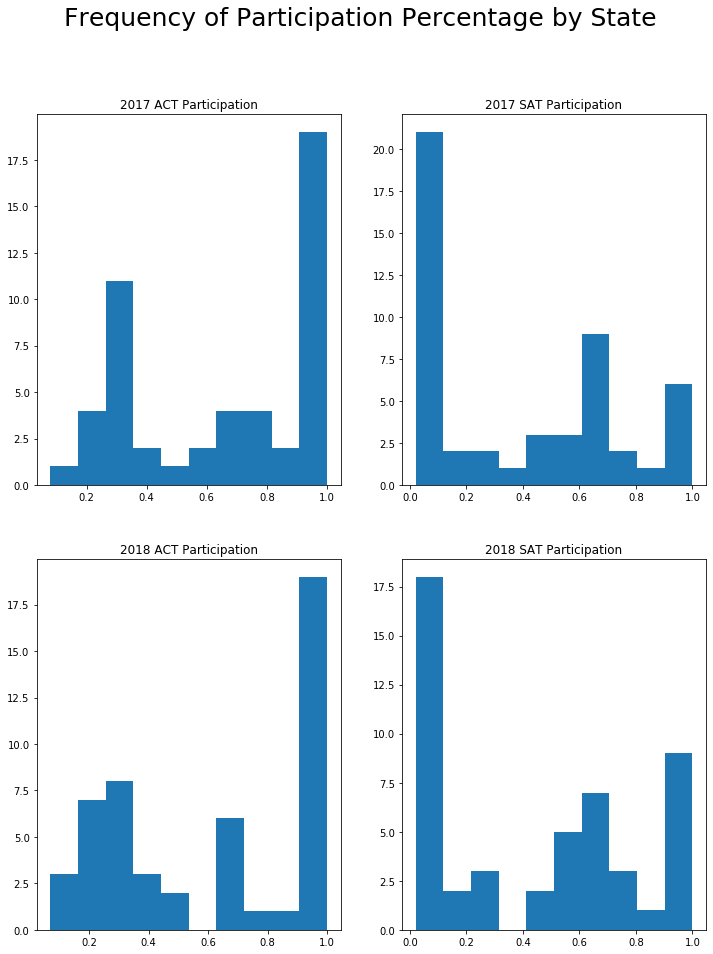

In [258]:
fig, ax = plt.subplots(2,2, figsize = (12, 15));
ax[0, 0].hist(final['act_2017_participation']);
ax[0, 0].set_title('2017 ACT Participation')
ax[0, 1].hist(final['sat_2017_participation']);
ax[0, 1].set_title('2017 SAT Participation')
ax[1, 0].hist(final['act_2018_participation']);
ax[1, 0].set_title('2018 ACT Participation')
ax[1, 1].hist(final['sat_2018_participation']);
ax[1, 1].set_title('2018 SAT Participation');
fig.suptitle('Frequency of Participation Percentage by State', fontsize=25);

2017 ACT Participation:
There are quite a few states that have a very high particiaption rate (due to requirement by law). 

2017 SAT Participation:
There are more states that have a low participation rate. This could be because many more states require the ACT and students don't want to take both.

2018 ACT Participation:
This distribution looks similar to the previous year.

2018 SAT Participation:
It looks as though the low participation bin has decreased in size since the previous year. Also, there have been more high participation counts. This is probably due to some states started requiring the SAT in 2018.

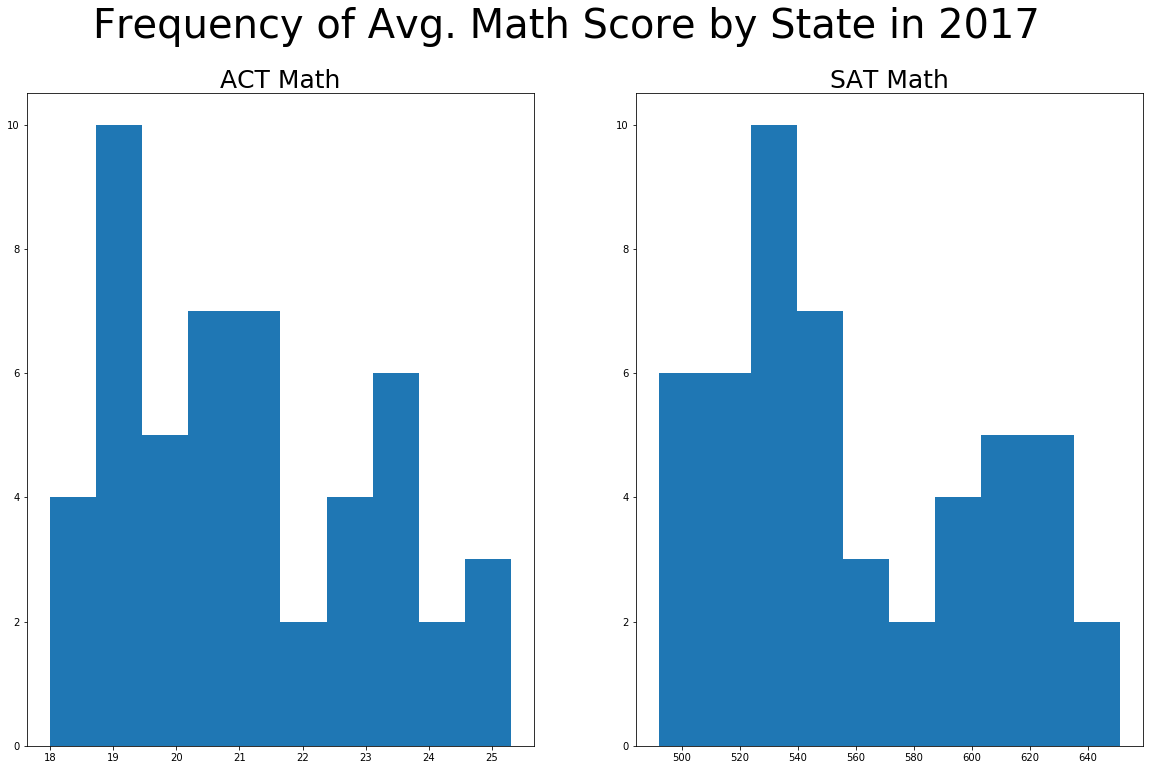

In [259]:
fig, ax = plt.subplots(1,2, figsize = (20, 12));
ax[0].hist(final['act_2017_math']);
ax[0].set_title('ACT Math', fontsize=25)
ax[1].hist(final['sat_2017_math']);
ax[1].set_title('SAT Math', fontsize=25)
fig.suptitle('Frequency of Avg. Math Score by State in 2017', fontsize=40);

These two distributions look similar. They both seem to be bimodal to a degree - the second peak is shorter than the first peak. 

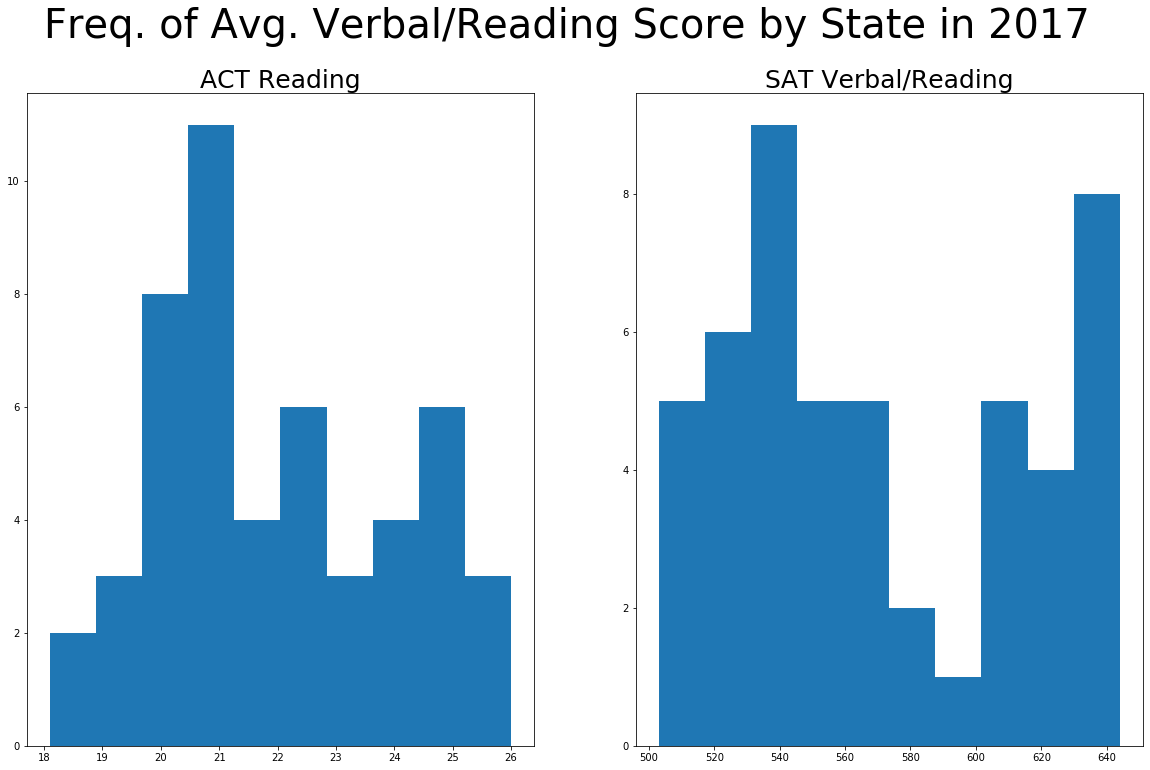

In [260]:
fig, ax = plt.subplots(1,2, figsize = (20, 12));
ax[0].hist(final['act_2017_reading']);
ax[0].set_title('ACT Reading', fontsize=25)
ax[1].hist(final['sat_2017_readwrite']);
ax[1].set_title('SAT Verbal/Reading', fontsize=25)
fig.suptitle('Freq. of Avg. Verbal/Reading Score by State in 2017', fontsize=40);

These two distributions look similar and bimodal. There is a large grouping of points on the lower end of the scoring spectrum with another peak towards the higher end.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


Text(0, 0.5, 'ACT Composite')

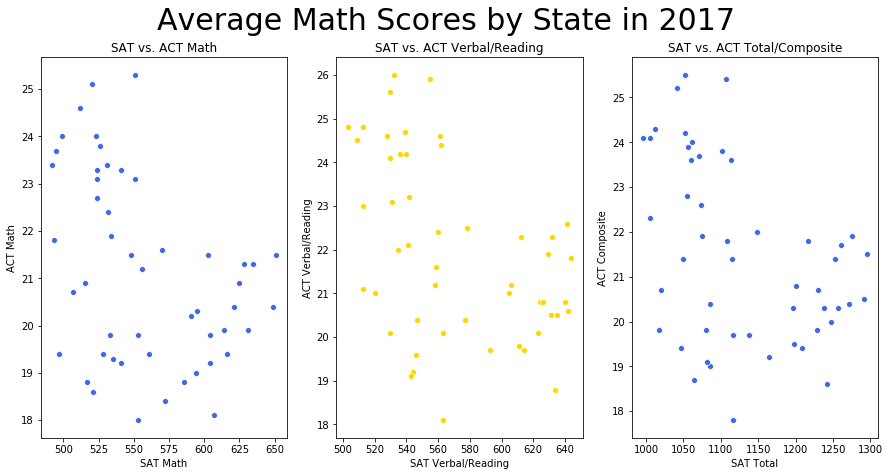

In [261]:
fig, axes = plt.subplots(1, 3, figsize=(15, 7))
fig.suptitle('Average Math Scores by State in 2017', fontsize=30)

sns.scatterplot(ax=axes[0], data=final, x='sat_2017_math', y='act_2017_math', color='royalblue')
axes[0].set_title('SAT vs. ACT Math')
axes[0].set_xlabel('SAT Math')
axes[0].set_ylabel('ACT Math')


sns.scatterplot(ax=axes[1], data=final, x='sat_2017_readwrite', y='act_2017_reading', color='gold');
axes[1].set_title('SAT vs. ACT Verbal/Reading')
axes[1].set_xlabel('SAT Verbal/Reading')
axes[1].set_ylabel('ACT Verbal/Reading')

sns.scatterplot(ax=axes[2], data=final, x='sat_2017_total', y='act_2017_composite', color='royalblue');
axes[2].set_title('SAT vs. ACT Total/Composite')
axes[2].set_xlabel('SAT Total')
axes[2].set_ylabel('ACT Composite')


All three of these scatter plots show that there is a grouping of states that have low scores in both tests, but there is no states that have above average scores in both tests. If states had above average scores in both tests, we'd see a few points in the upper right corner. So for high scoring states in either test: they are really good at one but not as good at the other.

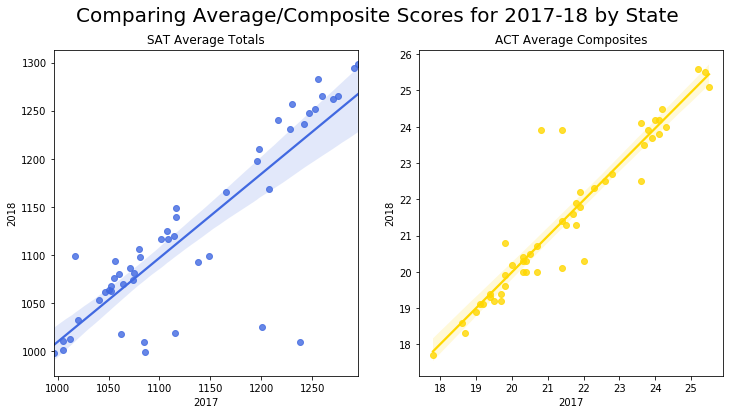

In [262]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Comparing Average/Composite Scores for 2017-18 by State', fontsize=20)

sns.regplot(ax= axes[0], data=final, x='sat_2017_total', y='sat_2018_total', color='royalblue');
axes[0].set_title('SAT Average Totals')
axes[0].set_xlabel('2017')
axes[0].set_ylabel('2018')

sns.regplot(ax=axes[1], data=final, x='act_2017_composite', y='act_2018_composite', color='gold');
axes[1].set_title('ACT Average Composites')
axes[1].set_xlabel('2017')
axes[1].set_ylabel('2018');

The ACT plot on the right: the comparison is very linear suggesting that average scores did not vary much between the years. 
The SAT plot on the left: the comparison is linear, but not as much as ACT. There seem to be more states that did well on the SAT in 2017 with a significant performance drop in 2018.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [263]:
# Creating custom seaborn boxplotter.
def plot_sns_boxplot(df, columns, super_title=None):
    if len(columns) > 3:
        fig, axes = plt.subplots(2, 2, figsize = (10,7))
        fig.suptitle(super_title, fontsize=20)
        axes = axes.ravel()
        for i in range(len(columns)):
            sns.boxplot(ax=axes[i], data=df, x=columns[i])
            axes[i].set_title(columns[i].replace('_', ' ').title())
            axes[i].set_xlabel('')
            
    else:
        fig, axes = plt.subplots(len(columns), 1, figsize=(10, 7))
        fig.suptitle(super_title, fontsize=20)
        for i in range(len(columns)):
            sns.boxplot(ax=axes[i], data = df, x=columns[i])
            axes[i].set_title(columns[i].replace('_', ' ').title())
            axes[i].set_xlabel('')

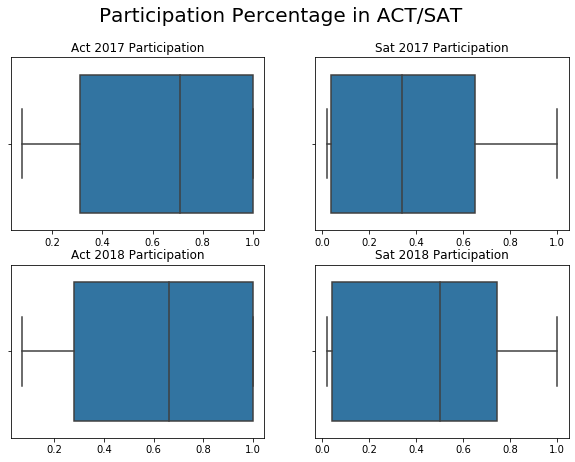

In [264]:
plot_sns_boxplot(final,['act_2017_participation', 'sat_2017_participation', 'act_2018_participation', 'sat_2018_participation'], 'Participation Percentage in ACT/SAT')

Significant change in median participation rate from SAT 2017 to SAT 2018. Range is approximately the same. No outliers.

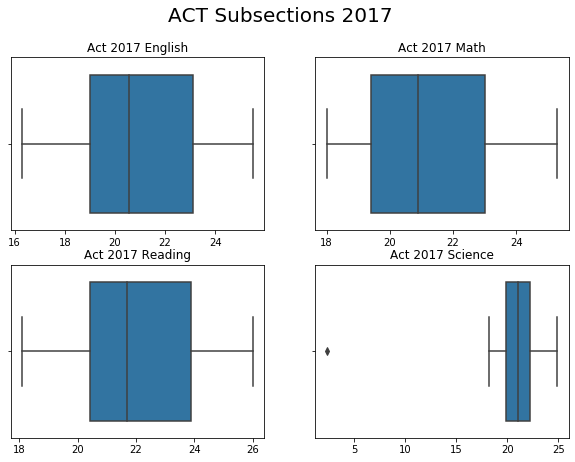

In [265]:
plot_sns_boxplot(final, ['act_2017_english', 'act_2017_math', 'act_2017_reading', 'act_2017_science'], 'ACT Subsections 2017')

There seems to be an outlier in the ACT 2017 Science subcategory.

In [266]:
# Finding lowest science score
lowest=final['act_2017_science'].min()
lowest

2.3

In [267]:
# Finding state with lowest science score
final[final['act_2017_science'] == lowest]

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_readwrite,sat_2017_math,sat_2017_total,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_readwrite,sat_2018_math,sat_2018_total,act_participation_change,sat_participation_change
20,Maryland,0.28,23.3,23.1,24.2,2.3,23.6,0.69,536,524,1060,0.31,22.5,0.76,545,535,1080,0.03,0.07


After cross refrencing this data point, I've determined this is a data entry error.

In [268]:
# Fixed
final.loc[final['state'] == 'Maryland', 'act_2017_science'] = 23.2
final.loc[final['state'] == 'Maryland', 'act_2017_science']

20    23.2
Name: act_2017_science, dtype: float64

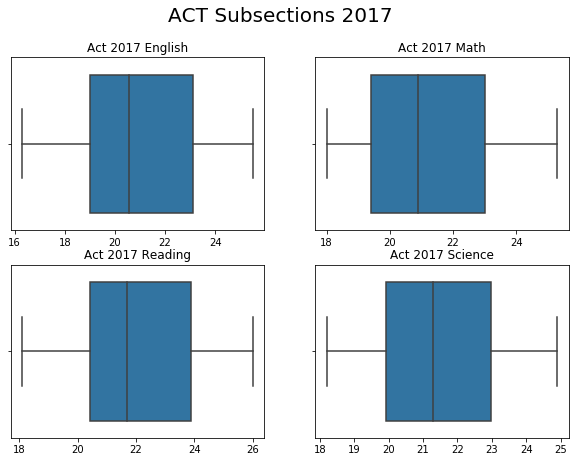

In [269]:
# Fixed ACT 2017 Science box plot included. 
plot_sns_boxplot(final, ['act_2017_english', 'act_2017_math', 'act_2017_reading', 'act_2017_science'], 'ACT Subsections 2017')

Range of english subsection is almost two points lower than the other sections. Median scores all between 20-21. No outliers now.

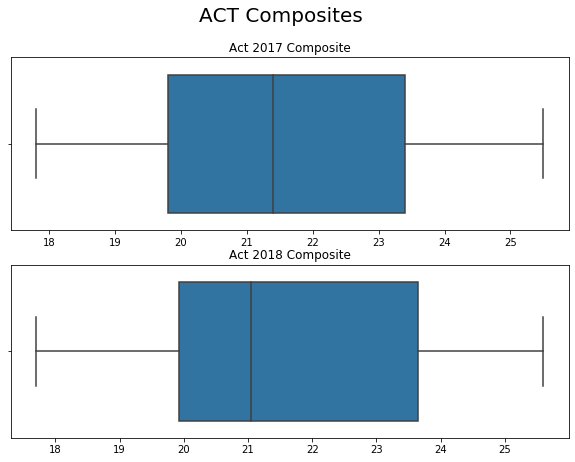

In [270]:
plot_sns_boxplot(final, ['act_2017_composite', 'act_2018_composite'], 'ACT Composites')

Slight shift in IQR. Median slightly lower 2018. Range is approximately the same. No outliers.

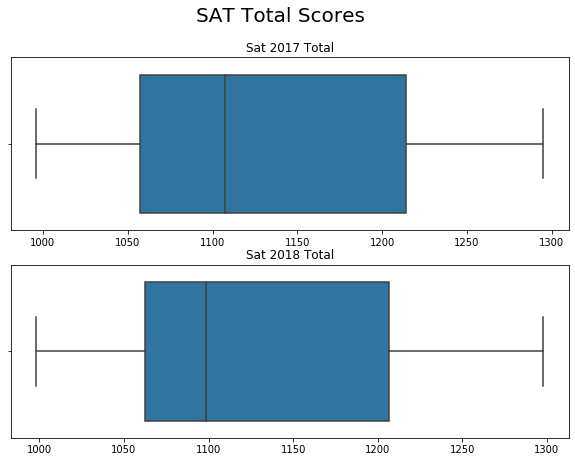

In [271]:
plot_sns_boxplot(final, ['sat_2017_total', 'sat_2018_total'], 'SAT Total Scores')

Slight narrowing of IQR. Median slightly lower in 2018. Range is approximately the same. No outliers

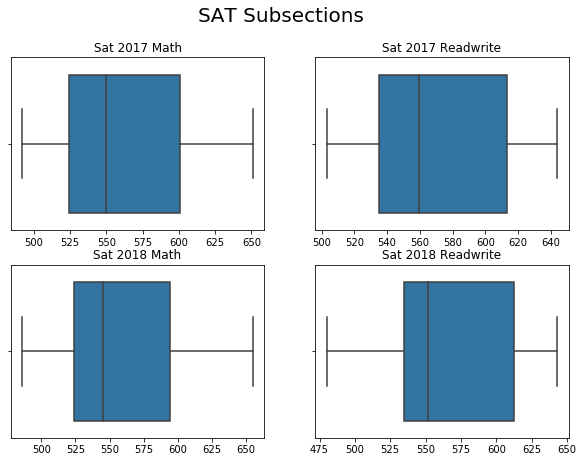

In [272]:
plot_sns_boxplot(final, ['sat_2017_math', 'sat_2017_readwrite', 'sat_2018_math', 'sat_2018_readwrite'], 'SAT Subsections')

The bottom range of SAT 2018 english lowered a bit. Unfortunatly this change modified the automatic scale of my graph making it look significantly different to the eye.

[(460, 660)]

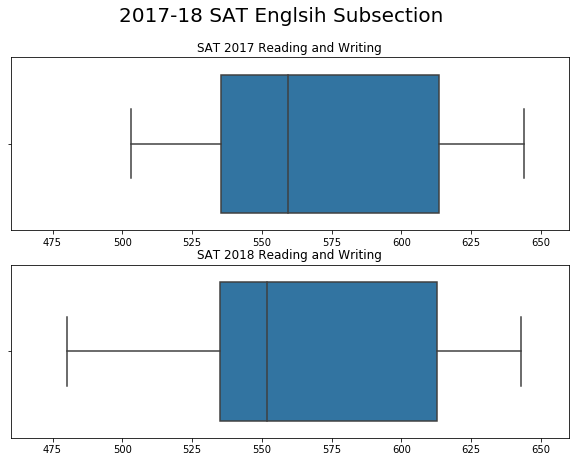

In [273]:
# Hard coding these boxplots to accurately compare figures.
fig, axes = plt.subplots(2, 1, figsize=(10, 7))
fig.suptitle("2017-18 SAT Englsih Subsection", fontsize=20)
sns.boxplot(ax=axes[0], data = final, x='sat_2017_readwrite')
axes[0].set_title('SAT 2017 Reading and Writing')
axes[0].set_xlabel('')
axes[0].set(xlim=(460, 660))
sns.boxplot(ax=axes[1], data = final, x='sat_2018_readwrite')
axes[1].set_title('SAT 2018 Reading and Writing')
axes[1].set_xlabel('')
axes[1].set(xlim=(460, 660))

The range increased in 2018. The minimum scores were lower in 2018. The median decreased slightly. IQR and higher scores are approximately the same. No outliers.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

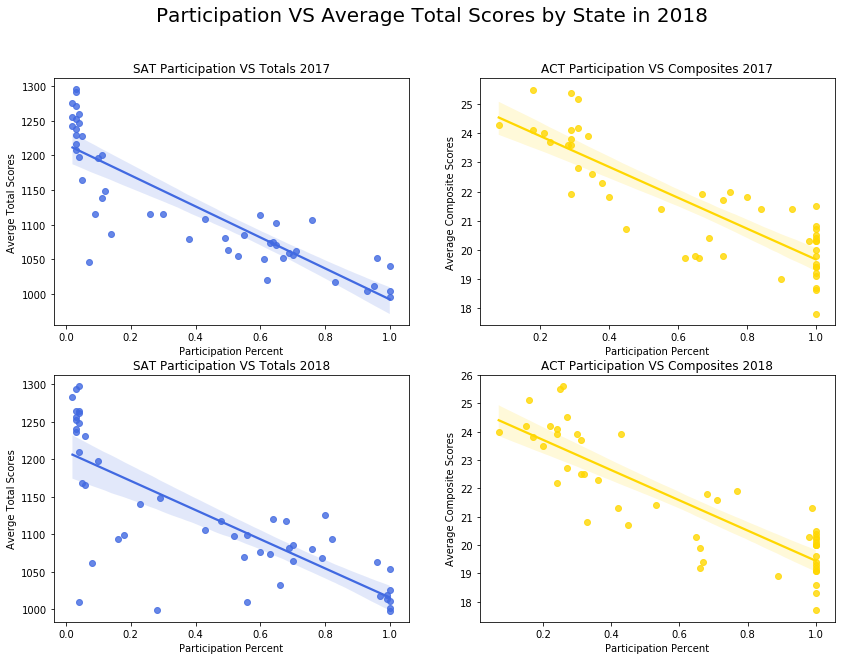

In [274]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Participation VS Average Total Scores by State in 2018', fontsize=20)

sns.regplot(ax= axes[0, 0], data=final, x='sat_2017_participation', y='sat_2017_total', color='royalblue');
axes[0, 0].set_title('SAT Participation VS Totals 2017')
axes[0, 0].set_xlabel('Participation Percent')
axes[0, 0].set_ylabel('Averge Total Scores')

sns.regplot(ax=axes[0, 1], data=final, x='act_2017_participation', y='act_2017_composite', color='gold');
axes[0, 1].set_title('ACT Participation VS Composites 2017')
axes[0, 1].set_xlabel('Participation Percent')
axes[0, 1].set_ylabel('Average Composite Scores');

sns.regplot(ax= axes[1, 0], data=final, x='sat_2018_participation', y='sat_2018_total', color='royalblue');
axes[1, 0].set_title('SAT Participation VS Totals 2018')
axes[1, 0].set_xlabel('Participation Percent')
axes[1, 0].set_ylabel('Averge Total Scores')

sns.regplot(ax=axes[1, 1], data=final, x='act_2018_participation', y='act_2018_composite', color='gold');
axes[1, 1].set_title('ACT Participation VS Composites 2018')
axes[1, 1].set_xlabel('Participation Percent')
axes[1, 1].set_ylabel('Average Composite Scores');

These graphs show a negative linear association between participation and average total score by state. 

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

## SAT Participation Rates in 2018 
![](./images/sat_2018_participation.png)

SAT participation is more popular around the perimeter of the US

## ACT Participation Rates in 2018

![](./images/act_2018_participation.png)

ACT participation greater in the middle of the country

![](./images/sat_2018_greater_participation.png)

States that have a greater SAT participation rate

![](./images/act-vs-sat-participation.png)

This map shows which states have a greater ACT participation rate (gold) contrasted with states that have a greater SAT participation rate.

![](./images/act-sat-part-perc.png)

This is the same as the previous graph but now accentuating the actual participation rate. The darker the color of state the more that state is in ACT/SAT camp.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

### Colorado:
Colorado stopped requiring the ACT in 2017 and added an SAT requirement in 2018 for all public school juniors. The contract for public school testing was reopened and bids were made between the two 'testing giants': The College Board (SAT) and the ACT testing company (ACT). The Colorado school board ended up choosing the College Board citing, "the selection committee chose the PSAT in part because it aligns with the high school Common Core English language arts and math standards, which Colorado adopted. The state said the committee also found “the College Board’s reporting system more useful to students, as it connects students to resources and activities designed to help identify next steps for extra support or possible acceleration.” (https://co.chalkbeat.org/2015/12/23/21092477/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers)

### Illinois:

Illiois's SAT participation rate increased from 9% to 99%. This increase was due to legislation adopted in 2017 (effective 2018) that provided SAT test fee waivers for public school students.

### Utah:
Utah had a significant drop in average score from 1238 to 1010. There seems to be discrepancy in the 2018 (1010 average) figure. According to the College Board's 2018 Utah Suite of Assessment Annual Report, Utah had an average SAT score 1230. 

https://reports.collegeboard.org/pdf/2018-utah-sat-suite-assessments-annual-report.pdf

### Florida:
In 2017, Florida's participation was high in both tests. ACT: 73% SAT: 83%. There was a significant drop in 2018: ACT: 66% SAT: 56%.
I dug into this a little more and found the SAT Suite of Assessments annual report. The data here (https://reports.collegeboard.org/pdf/2018-florida-sat-suite-assessments-annual-report.pdf) seem to tell a different story. The 2018 participation rate cited in this report is 97% for high school graduates which conflicts with our 56% figure. I could not find the original source for the SAT 56% participation figure.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

### Ans:
Regardless of test, states with low participation rates would most likely see their partcipation rates increase if they passed legislation that would cover the test fee for students. I would advise states to be cautious when deciding to make a test mandatory. Although participation rates will be 100%, average test scores will be lower which might discourage people, mainly parents, to move to states because of the perception of 'poor quality' public schools. 

As for additional data: I would like to analyze college application rates per state and average college acceptance rate by state.

The College Board could lobby at the local and state level for governing bodies to provide scholarships, waivers or even make the test mandatory. 

Additionally, if higher college acceptance rates are correlated to higher average participation in the SAT, the College Board could run a marketing campaign targeting seniors in states with low participation rates.

## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

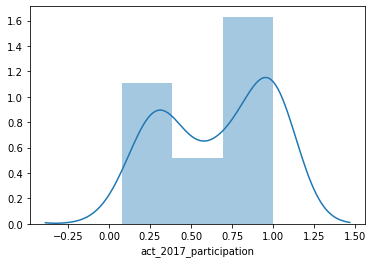

In [275]:
sns.distplot(final['act_2017_participation'])

The seaborn visualization displayes the bimodality in the ACT 2017 participation rates.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Below I am testing for normality using the Shapiro-Wilkes normality test and setting a significance level of .05

In [276]:
import scipy.stats as stats
# Setting a significance level of .05
# Assessing normality of composite/totals columns
totals =['act_2017_composite', 'act_2018_composite', 'sat_2017_total', 'sat_2018_total'] 
for total in totals:
    test_stat, p_value = stats.shapiro(list(final[total]))
    print(f'{total} has a p_val of ' + str(p_value))

act_2017_composite has a p_val of 0.04782438650727272
act_2018_composite has a p_val of 0.022896280512213707
sat_2017_total has a p_val of 0.0021260969806462526
sat_2018_total has a p_val of 0.0013465480878949165


Since the p-val for all totals/composites is less than my previously set significance level of .05, we can reject null hypothesis that this data is normally distributed.

In [277]:
subsections = ['act_2017_english', 'act_2017_math', 'act_2017_reading', 'act_2017_science', 'sat_2017_readwrite', 'sat_2017_math', 'sat_2018_math', 'sat_2018_readwrite']

for subsection in subsections:
    test_stat, p_value = stats.shapiro(list(final[subsection]))
    print(f'{subsection} has a p_val of ' + str(p_value))

act_2017_english has a p_val of 0.03347943723201752
act_2017_math has a p_val of 0.04503060504794121
act_2017_reading has a p_val of 0.07006272673606873
act_2017_science has a p_val of 0.13205112516880035
sat_2017_readwrite has a p_val of 0.0006182215875014663
sat_2017_math has a p_val of 0.007149992510676384
sat_2018_math has a p_val of 0.006011859513819218
sat_2018_readwrite has a p_val of 0.0037813871167600155


Since the p-val for all act_2017_reading and act_2017_science is greater than my previously set significance level of .05, we fail to reject the null hypothesis that this data is normally distributed.

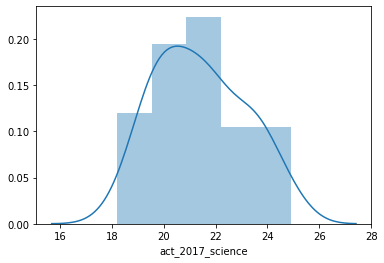

In [278]:
sns.distplot(final['act_2017_science']);

The KDE looks relatively normal. 

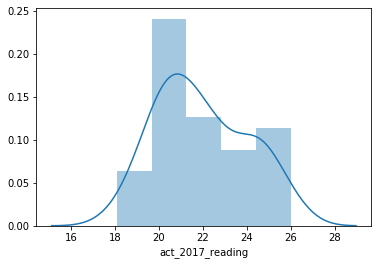

In [279]:
sns.distplot(final['act_2017_reading'])

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: I would say it does not make sense to conduct statistical inference given these data. These two participation rates are not independent of each other. If one state has a high participation rate in the ACT it would make sense for the same state to have a lower participation rate in the SAT because most students don't take both tests.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: No. They are on a different scale. If we normalize the data it would make more sense. Also, I am not sure if test scores can be considered continuous. Maybe a discrete variable hypothesis test would be better? Below, I go through the motions of the signficance test assuming a non normal distribution and continuous variables.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [334]:
from sklearn.preprocessing import normalize
# Normalizing math scores from ACT and SAT
norm_act_2017_math = normalize(np.array(final['act_2017_math']).reshape(1, -1), norm='max')
norm_sat_2017_math = normalize(np.array(final['sat_2017_math']).reshape(1, -1), norm='max')

In [335]:
(norm_act_2017_math, norm_sat_2017_math)

(array([[0.72727273, 0.7826087 , 0.7826087 , 0.75098814, 0.8972332 ,
         0.80237154, 0.97233202, 0.92490119, 0.76679842, 0.82608696,
         0.75889328, 0.86166008, 0.83794466, 0.88537549, 0.84189723,
         0.84189723, 0.76679842, 0.743083  , 0.9486166 , 0.91304348,
         1.        , 0.93675889, 0.84980237, 0.71541502, 0.78656126,
         0.79841897, 0.82608696, 0.71146245, 0.99209486, 0.94071146,
         0.76679842, 0.9486166 , 0.76284585, 0.80632411, 0.85375494,
         0.743083  , 0.84980237, 0.92490119, 0.92094862, 0.73517787,
         0.84980237, 0.75889328, 0.81818182, 0.78656126, 0.91304348,
         0.92094862, 0.86561265, 0.76679842, 0.80632411, 0.7826087 ]]),
 array([[0.87864823, 0.8187404 , 0.84946237, 0.9124424 , 0.80491551,
         0.91397849, 0.78648233, 0.75576037, 0.76344086, 0.79109063,
         0.83102919, 0.75729647, 0.85407066, 0.8172043 , 0.97542243,
         0.96466974, 0.94623656, 0.90015361, 0.76651306, 0.80491551,
         0.84639017, 0.76036866

In [336]:
(norm_act_2017_math.mean(), norm_sat_2017_math.mean())

(0.8354150197628458, 0.8581566820276497)

In [337]:
# Setting significance level at .05
# Null hypothesis is that the means of the population are the same
stats.mannwhitneyu(norm_act_2017_math, norm_sat_2017_math)

MannwhitneyuResult(statistic=-1.0, pvalue=0.022738145420471326)

Since the p-value of the Mann Whitney U significance test is less than the previous set significance level of .05, we must reject the null hypothesis that the means of the two populations are the same.

In [338]:
# Just curious what the pval would be for a t-test.
stats.ttest_ind(norm_act_2017_math, norm_sat_2017_math, axis=1)

Ttest_indResult(statistic=array([-1.53005785]), pvalue=array([0.12922403]))